# Load and explore the data

**Seeding**

In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

2025-09-22 20:11:26.045345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758571886.300111      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758571886.371613      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Importing dependancies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Get data**

The code is from Kaggle

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plantvillage-dataset


I didn't moved the dataset to the content folder cause it takes some time and I didn'h had it but if u want to use this code :
```
!cp -r /kaggle/input/plantvillage-dataset /content/plantvillage-dataset
```



In [4]:
print(os.listdir('/kaggle/input/plantvillage-dataset'))

['segmented', 'grayscale', 'plantvillage dataset', 'color']


In [5]:
print(len(os.listdir('/kaggle/input/plantvillage-dataset/segmented')))
print(os.listdir('/kaggle/input/plantvillage-dataset/segmented'))

38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomat

In [6]:
print(len(os.listdir('/kaggle/input/plantvillage-dataset/grayscale')))
print(os.listdir('/kaggle/input/plantvillage-dataset/grayscale'))

38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomat

In [7]:
print(len(os.listdir('/kaggle/input/plantvillage-dataset/color')))
print(os.listdir('/kaggle/input/plantvillage-dataset/color'))

38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomat

The dataset contains 3 folders, the 3 folders contain the same images but the difference is in the colors, the segmented contains images wityhout background(just the leaf image), the color contains RGB images and grascale contains grayscale images.

There are 38 types of plant diseases and each folder contains 38 sub folders containing images of a specific plant disease.

In [8]:
number_of_images = 0
for i in os.listdir('/kaggle/input/plantvillage-dataset/color'):
  number_of_images += len(os.listdir('/kaggle/input/plantvillage-dataset/color/' + i))
print(number_of_images)


54305


We have 54306 images

In [9]:
print(len(os.listdir('/kaggle/input/plantvillage-dataset/color/Potato___Late_blight')))
print(os.listdir('/kaggle/input/plantvillage-dataset/color/Potato___Late_blight')[2])

1000
63ec8c33-368c-433d-8953-f28f30e5985f___RS_LB 2943.JPG


# Data Processing

In [10]:
base_dir = '/kaggle/input/plantvillage-dataset/color'

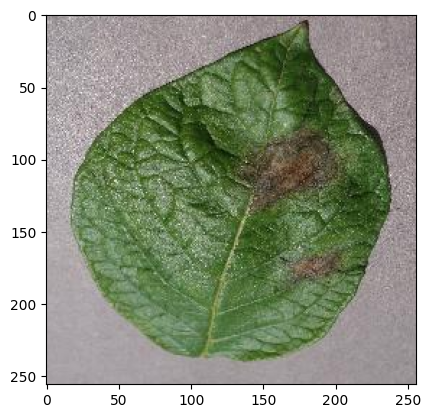

In [11]:
image_path = '/kaggle/input/plantvillage-dataset/color/Potato___Late_blight/1736a728-bae9-4133-bfca-60a7c3b6382c___RS_LB 4855.JPG'

img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()

In [12]:
img.shape

(256, 256, 3)

**NOTE** : Since we will be using the ResNet50 CNN, we don't need to resize, the 256 is the needed size.

In [13]:
img

array([[[156, 150, 152],
        [165, 159, 161],
        [179, 173, 175],
        ...,
        [133, 121, 123],
        [158, 146, 148],
        [150, 138, 140]],

       [[145, 139, 141],
        [168, 162, 164],
        [161, 155, 157],
        ...,
        [139, 127, 129],
        [156, 144, 146],
        [166, 154, 156]],

       [[141, 135, 137],
        [161, 155, 157],
        [143, 137, 139],
        ...,
        [144, 132, 134],
        [165, 153, 155],
        [164, 152, 154]],

       ...,

       [[172, 166, 170],
        [170, 164, 168],
        [167, 161, 165],
        ...,
        [153, 147, 149],
        [153, 147, 149],
        [152, 146, 148]],

       [[171, 165, 169],
        [170, 164, 168],
        [168, 162, 166],
        ...,
        [151, 145, 147],
        [151, 145, 147],
        [151, 145, 147]],

       [[170, 164, 168],
        [169, 163, 167],
        [169, 163, 167],
        ...,
        [148, 142, 144],
        [150, 144, 146],
        [152, 146, 148]]

**Train Test Split with a new method**

Actually, we can use the traditional way to resize images and split them, but since the images are in different folders it will take some time and probably lead to crash the colab session, that's why we use the **ImageDataGenerator** cause it works in a batch way (not all the images at the same time) so it is like we are defining a workflow.

Another thing that makes this method really good is that we don't have to specify the labels names, it will directly extract it from folders names cause it will directly recognize that the data is organized in subfolders and that each subfolder is a class

In [14]:
img_size = 256
batch_size = 32

In [15]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

**NOTE :** Even though we don't need to resize, the target size parameter is essential and we can't remove it

In [16]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical',
    seed = 42,
    shuffle = True
)

Found 43456 images belonging to 38 classes.


In [17]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    seed = 42,
    shuffle = False 
)

Found 10849 images belonging to 38 classes.


**NOTE :** The best practice is :

* Train with train_generator.

* Monitor with validation_generator.

* Evaluate only once at the end with test_generator (what we don't have here)

**How?**

Have a separate test_dir and then apply those 2 instructions :

```
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_directory(
    test_dir,  
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # important for evaluation/prediction
)
```
Then after training:

```
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_acc)
```




# ResNet50 + CNN

In [18]:
from tensorflow.keras import Sequential, models, layers, optimizers
from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model, Model

In [19]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

I0000 00:00:1758571933.198879      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [20]:
num_of_classes = 38

model = models.Sequential()

model.add(convolutional_base) #our pretrained model
model.add(layers.Flatten())
model.add(layers.BatchNormalization()) #we should use only if we didn't normalized (/255) earlier but we add it cause we will have more efficient results
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) #0.5 means at each training step, 50% of the neurons in that layer are randomly "turned off" (their output is set to zero)
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 131072)         │       524,288 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,900,838 (156.02 MB)

 Trainable params: 40,585,190 (154.82 MB)

 Non-trainable params: 315,648 (1.20 MB)

**Note**

include_top=False → means you remove the classifier part (the fully connected layers at the end of ResNet50).

What remains is the convolutional base that outputs rich feature maps (edges, shapes, textures, high-level patterns).

But! This is not yet a prediction, just features.

**That’s why you need to add new layers:**

Dense layers with ReLU + BatchNorm → to learn combinations of the extracted features.

Dropout → to prevent overfitting.

Final softmax layer → to actually classify into your target classes.

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

**Model Training**

**Why we specify steps_per_epoch and validation_steps ?**

A generator like train_generator doesn’t load all data at once, instead, it yields batches of size batch_size.
Keras needs to know: “How many batches = 1 epoch?”

In [22]:
history = model.fit(
    train_generator,
    #steps_per_epoch=train_generator.samples // batch_size, #train_generator.samples = number of images in the training set so // batch_size => number of batches
    epochs=30,
    validation_data=validation_generator
    #validation_steps=validation_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1758571988.328926     111 service.cc:148] XLA service 0x7961c0002a40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758571988.330269     111 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758571993.048458     111 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1758572015.135256     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 413s 248ms/step - accuracy: 0.4429 - loss: 2.1940 - val_accuracy: 0.6022 - val_loss: 1.5595
Epoch 2/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 277s 204ms/step - accuracy: 0.7590 - loss: 0.8441 - val_accuracy: 0.8128 - val_loss: 0.6615
Epoch 3/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 279s 205ms/step - accuracy: 0.8304 - loss: 0.5820 - val_accuracy: 0.8687 - val_loss: 0.4442
Epoch 4/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 204ms/step - accuracy: 0.8521 - loss: 0.5085 - val_accuracy: 0.7934 - val_loss: 0.7363
Epoch 5/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 276s 203ms/step - accuracy: 0.8749 - loss: 0.4303 - val_accuracy: 0.8757 - val_loss: 0.3841
Epoch 6/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 205ms/step - accuracy: 0.8908 - loss: 0.3809 - val_accuracy: 0.8887 - val_loss: 0.3487
Epoch 7/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 205ms/step - accuracy: 0.8956 - loss: 0.3579 - val_accuracy: 0.9261 - val_loss: 0.2238
Epoch 8/30
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 278s 204ms/step - accuracy: 0.9

**Model Evaluation**

In [23]:
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

339/339 ━━━━━━━━━━━━━━━━━━━━ 23s 69ms/step - accuracy: 0.9883 - loss: 0.0429
Validation Loss: 0.0508
Validation Accuracy: 0.9854


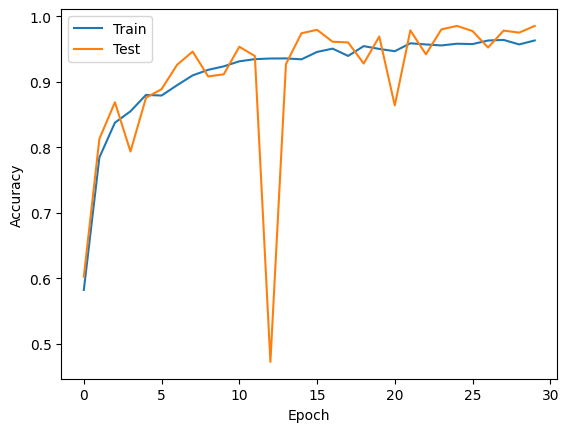

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

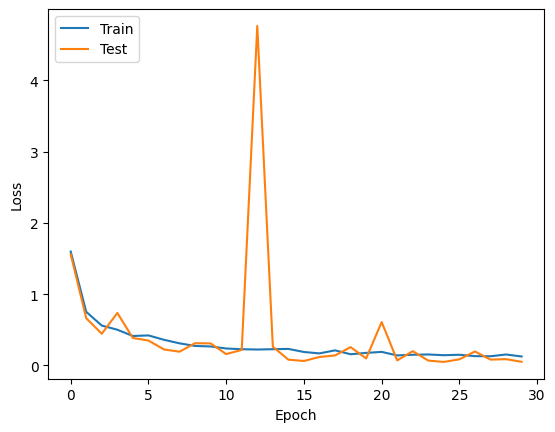

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

**Building a predictive model**

In [41]:
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((256, 256))
    plt.imshow(img)
    plt.show()
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array = img_array.astype('float32') / 255  # Normalize pixel values to [0, 1]
    return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessing_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessing_img)
  print(predictions.shape)   # should be (N, 38)
  print(np.sum(predictions[0]))  # should be ~1.0 (since softmax)
  predicted_class_index = np.argmax(predictions, axis=1)[0]
  print(predicted_class_index)
  predicted_class_label = class_indices[predicted_class_index]
  return predicted_class_label

In [27]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [28]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
json.dump(class_indices, open('class_indices.json', 'w'))

**Example**

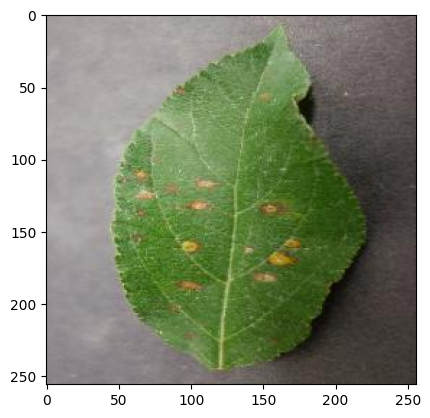

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(1, 38)
1.0
2
The predicted class is: Apple___Cedar_apple_rust


In [46]:
#apple cedar apple rust
image_path = '/kaggle/input/plantvillage-dataset/color/Apple___Cedar_apple_rust/1cfc6e73-1d86-4fb9-bffb-010163531711___FREC_C.Rust 3944.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)
print(f'The predicted class is: {predicted_class_name}')

**Save the model**

In [33]:
model.export("plant_disease_model")

Saved artifact at 'plant_disease_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_175')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  133464615461968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133464615460048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133464615462160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133464615459664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133464615461392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133464615461776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133463525886288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133463525887824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133463525888784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133463525886480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133463

In [47]:
import shutil

# Zip the folder
shutil.make_archive("/kaggle/working/plant_disease_model", 'zip', "/kaggle/working/plant_disease_model")

'/kaggle/working/plant_disease_model.zip'

In [48]:
model.save('plant_disease_model.h5')